# Developing statistical likelihood indicators for radar mapping of tropical forest biomass

Hai Vy Nguyen and Van Hao Hoang - Engineering students at INSA Toulouse

[Email]

hvnguyen@etud.insa-toulouse.fr

vhoang@etud.insa-toulouse.fr

This work was under the instruction of Prof L. Villard

## Introduction

Forests play a primordial role in life on Earth and therefore it is essential to improve our knowledge of the contribution of forests to the carbon cycle. A basic parameter for characterizing the spatial distribution of carbon in the biosphere is biomass. Several airborne campaigns have been carried out with the support of reference data. However, these reference measurements, also known as external validation, can only be applied on a local scale and not at a global scale as targeted by the BIOMASS satellite coverage. Hence, the objective of this research is to develop internal validation criteria to characterize the potential defects of a biomass map without external reference data. We relied on the Datasets of the airborne radar and LIDAR campaigns for the learning phase to select the metrics. This includes comparing variograms, intercorrelations, which highlight the likelihood of the biomass maps which were used to characterize the spatial variability of the most reliable areas which were used as a reference. The computations in this study were performed in Python. We obtained a significant result: verifying the accuracy of the Biomass map of tropical forests in Africa without reference data. The statistical indicators in this study are promising for applications in other satellite mapping projects.

## Materials
Our studied area is located in the national park named Lopé National Park in central Gabon, Africa, expanding from Upper Left ( 11$^{\circ}$32'19.17"E,  0$^{\circ}$ 7'14.76"S) to Lower Right ( 11$^{\circ}$35'28.10"E,  0$^{\circ}$10'45.10"S).


## Methods

### 1 .Characterizing the spatial variability by studying variogram

The semi-variogram is the basic tool for estimating the statistical dependence (spatial autocorrelation) value. Indeed, the semi-variogram will tell us about how things are similar or dissimilar over space. We can compute the statistics Semivariance by this formula : 
\begin{equation}\label{eq:variogram}
\gamma(\mathbf{h})=\frac{1}{2 N(\mathbf{h})} \sum_{\alpha=1}^{N(\mathbf{h})}\left(\mathbf{z}\left(\mathbf{u}_{\alpha}\right)-z\left(\mathbf{u}_{\alpha}+\mathbf{h}\right)\right)^{2}
\end{equation}
with :

* $\mathbf{u}$ : vector of spatial coordinates (with components x, y or “easting” and “northing” for our 2D example)
* $z\left(\mathbf{u}\right)$ : variable under consideration as a function of spatial location (AGB,FH,DTM in this example)
* $\mathbf{h}$ : lag vector representing separation between two spatial locations
* $z\left(\mathbf{u}+\mathbf{h}\right)$ : lagged version of variable under consideration
\end{itemize}

Usually these models need three parameters to fit to the experimental variogram. All three parameters have a meaning and are usefull to learn something about the data. This upper bound a model approaches is called sill. The distance at which 95\% of the sill are approached is called the range. That means, the range is the distance at which observation values do not become more dissimilar with increasing distance. They are statistically independent. That also means, it doesn’t make any sense to further describe spatial relationships of observations further apart with means of geostatistics. The last parameter is the nugget. It is used to add semi-variance to all values. Graphically that means to move the variogram up on the y-axis. The nugget is the semi-variance modeled on the 0-distance lag. Compared to the sill it is the share of variance that can not be described spatially.
Important: Consider observations taken in the environment, it is fairly unlikely to find two pairs of observations where the separating distance between the coordinates match exactly the same value. Therefore it is useful to group all point pairs at the same distance lag together into one group, or bin.

### 2 . Autocorrelation
The 2-D auto-correlation of an matrix is the 2-D auto-correlation between it and itself.
The 2-D auto-correlation of an matrix X (M-by-N), is a matrix, C. Its elements are given by:

$$
C(k, l)=\sum_{m=0}^{M-1} \sum_{n=0}^{N-1} X(m, n) X(m-k, n-l),
$$
The output matrix, C(k,l), has negative and positive row and column indices (count from the middle):
* A negative row index corresponds to an upward shift of the rows of X.
* A negative column index corresponds to a leftward shift of the columns of X.
* A positive row index corresponds to a downward shift of the rows of X.
* A positive column index corresponds to a rightward shift of the columns of X

### 3. Intercorrelation

There a multiple statistical methods to measure similarity between 2-D images. The indicator used in methods is called cross-correlation. Normally, their absolute value vary from 0 (non-correlated) to 1 (fully correlated). Here, we use the Pearson correlation coefficient (PCC) as the statistical  indicator in measure similarity between above-ground biomass(AGB) and forest height. The formula of this indicator is defined as :
\begin{equation}
    PCC=\frac{\sum^m_{i=1}\sum^n_{j=1}\,(R_{ij}-\overline{R})(G_{ij}-\overline{G})}{\sqrt{\sum^m_{i=1}\sum^n_{j=1}\,(R_{ij}-\overline{R})^2} \times \sqrt{\sum^m_{i=1}\sum^n_{j=1}\,(G_{ij}-\overline{G})^2}}
\end{equation}

The denominator normalizes PCC so that it always lies in the range $-1$ to $+1$. Ideally, $PCC=1 $ indicates two perfectly linearly correlated images for which each red pixel ij deviates from the red mean in direct proportion to the deviation of the corresponding green pixel ij from the green mean. $PCC=0$ indicates two linearly uncorrelated images. $PCC=-1$ indicates two perfectly anti-correlated images (red and green deviations of equal magnitude but of opposite sign). A PCC value significantly different from zero is a measure of the degree to which two distributions are strongly correlated or anti-correlated.
#### Compute the slope

### 4. AGB estimation model
Linear Regression is a statistical analysis method that uses regression analysis in mathematical statistics to determine the quantitative relationship between variables. The LR, which assumes a linear relationship between a set of explanatory variables and a response, can be expressed by the following model:
$$
y_{i}=\beta_{0}+\beta_{1} x_{i 1}+\cdots+\beta_{p} x_{i p}+\varepsilon_{i}=\mathbf{x}_{i}^{\top} \boldsymbol{\beta}+\varepsilon_{i}, \quad i=1, \ldots, n
$$
Power Regression 
AGB can be predicted from FH using a power-law function.
$$ AGB =a \times FH^{b}$$
We apply the linear regression for $log(AGB)$ and $log(FH)$ to find a,b.

### 5. Studying  dependency of error on azimutal direction by using MSE

From model that we define above, we can get the prediction of AGB from forest height.
Then, we compute the error between original and predicted AGB map. We get the same size error map. From this map, we find the dependency of error on the azimutal direction. Here, we apply with a step of angle of $5^{\circ}$.
For each zone, we apply on points of each ray at the corresponding angle. The formula of MSE of given ray is defined as:
\begin{equation}
MSE = \frac{1}{\#\{given\:ray\}}\times\sum_{i,j\in \{given\:ray\}} (AGB_{ij}-AGB^{predicted}_{ij})^2
\end{equation}
Where:
* $\#\{given\:ray\}$ is the number of points of the given ray.
* $AGB_{ij}$ and $AGB^{predicted}_{ij}$ are the values of AGB at (i,j)-pixel on the original map and predicted map, 
We note that the rays are not completely straight because the pixels cannot be completely on the given rays. Therefore, we choose the pixels as close as possible to the given rays. Specifically, the form of selected rays is shown below:
<p align="center">
    <img src="./rayerr.png" width="220" height="240" />

</p>

## Results

### Getting started

Here's the steps to get setup in Python with the GDAL package:

* Install Anaconda 3 on your machine (https://www.anaconda.com/download/).
* From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal.
* In the terminal type: conda install -c conda-forge gdal


You will need to copy the data file to your working directory. The file's name is geo10mLiGLTd3LiDTM-CHM-AGB.tif

### Load the required libraries

In [59]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np

Here's the command to load our data

In [61]:
strImgFile = 'geo10mLiGLTd3LiDTM-CHM-AGB.tif'
gdal.UseExceptions()
ds = gdal.Open(strImgFile) # Data Stack
#print(ds.RasterCount, ds.RasterXSize, ds.RasterYSize)
 
geoT = ds.GetGeoTransform()
srs = ds.GetProjection() # features of geo projection system

dx, dy = ds.RasterXSize, ds.RasterYSize # [XY]resoltion
min_x = min(geoT[0], geoT[0]+dx*geoT[1])
max_x = max(geoT[0], geoT[0]+dx*geoT[1])
min_y = min(geoT[3], geoT[3] + geoT[-1]*dy)
max_y = max(geoT[3], geoT[3] + geoT[-1]*dy) # [ geographic coordinates extent ]
#
ds_band1 = np.array(ds.GetRasterBand(1).ReadAsArray())
ds_band2 = np.array(ds.GetRasterBand(2).ReadAsArray())
ds_band3 = np.array(ds.GetRasterBand(3).ReadAsArray())



# <<<< EoP <<<<<<<<<<<

### Display three bands

In this tif file, we have three rasters correspond to our data:
*  Band 1: DTM (Digital Terrain Model)
*  Band 2: FH (Forest Height)
*  Band 3: AGB (Above Ground Biomass) 
Each band can be understood as a matrix (numpy multidimensional array)


We will display 3 band by using matplotlib:


**DTM (Digital Terrain Model)**

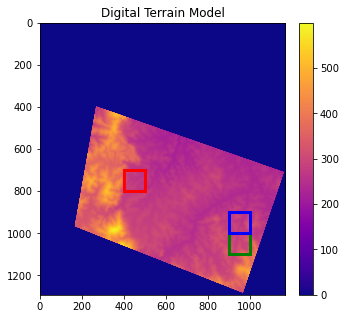

In [62]:
import matplotlib.patches as patches
fig, ax = plt.subplots(figsize=(5,5))
DTM_plot = ax.imshow(ds_band1, vmin=0,vmax=np.max(ds_band1),cmap='plasma')
ax.title.set_text("Digital Terrain Model")
plt.colorbar(DTM_plot,fraction=0.05, pad=0.05)
rect = patches.Rectangle((400, 700), 100, 100, linewidth=3, edgecolor='r', facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((900, 1000), 100, 100, linewidth=3, edgecolor='g', facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((900, 900), 100, 100, linewidth=3, edgecolor='b', facecolor='none')
ax.add_patch(rect)
plt.show()

**FH (Forest Height)**

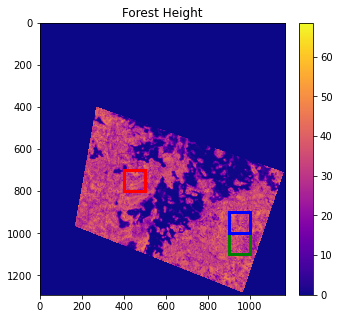

In [63]:
fig, ax = plt.subplots(figsize=(5,5))
DTM_plot = ax.imshow(ds_band2, vmin=0,vmax=np.max(ds_band2),cmap='plasma')
ax.title.set_text("Forest Height")
plt.colorbar(DTM_plot,fraction=0.05, pad=0.05)
rect = patches.Rectangle((400, 700), 100, 100, linewidth=3, edgecolor='r', facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((900, 1000), 100, 100, linewidth=3, edgecolor='g', facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((900, 900), 100, 100, linewidth=3, edgecolor='b', facecolor='none')
ax.add_patch(rect)
plt.show()

**AGB (Above Ground Biomass)**

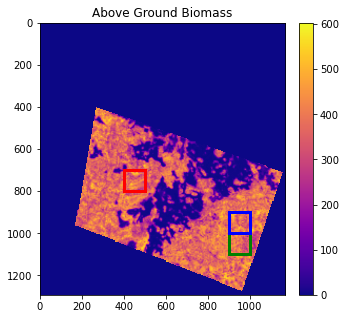

In [64]:
fig, ax = plt.subplots(figsize=(5,5))
DTM_plot = ax.imshow(ds_band3, vmin=0,vmax=np.max(ds_band3),cmap='plasma')
ax.title.set_text("Above Ground Biomass")
plt.colorbar(DTM_plot,fraction=0.05, pad=0.05)
rect = patches.Rectangle((400, 700), 100, 100, linewidth=3, edgecolor='r', facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((900, 1000), 100, 100, linewidth=3, edgecolor='g', facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((900, 900), 100, 100, linewidth=3, edgecolor='b', facecolor='none')
ax.add_patch(rect)
plt.show()

The discontinuity of the topography as well as of other parameters such as AGB and FH makes the study of geo-statistics very complicated. So, for the framework of this study, we will focus on 3 sub-regions (marked in the Figure) which have a continuous variability in space to increase the accuracy of the calculations in the following sections.

In [70]:
ds11= ds_band1[700-2:800-2,400-1:500-1]
ds21= ds_band2[700-2:800-2,400-1:500-1]
ds31= ds_band3[700-2:800-2,400-1:500-1]

ds12= ds_band1[1000-2:1100-2,900-1:1000-1]
ds22= ds_band2[1000-2:1100-2,900-1:1000-1]
ds32= ds_band3[1000-2:1100-2,900-1:1000-1]

ds13= ds_band1[900-2:1000-2,900-1:1000-1]
ds23= ds_band2[900-2:1000-2,900-1:1000-1]
ds33= ds_band3[900-2:1000-2,900-1:1000-1]

### Variogram

We estimate the statistical dependence (spatial autocorrelation) value by displaying the variograms in three zones

In [65]:
from skgstat import Variogram
from skgstat import DirectionalVariogram

We generate a numpy array that consists the x,y-coordinate of the matrix and its value corresponding to DTM,AGB,FH

In [ ]:
########
dataAGB=[]
for i in range(ds11.shape[0]):
    for j in range(ds11.shape[1]):
        dataAGB+=[[i,j,ds31[i,j],ds32[i,j],ds33[i,j]]]
dataAGB=np.array(dataAGB)
########
dataFH=[]
for i in range(ds11.shape[0]):
    for j in range(ds11.shape[1]):
        dataFH+=[[i,j,ds21[i,j],ds22[i,j],ds23[i,j]]]
dataFH=np.array(dataFH)
########
dataTM=[]
for i in range(ds11.shape[0]):
    for j in range(ds11.shape[1]):
        dataTM+=[[i,j,ds11[i,j],ds12[i,j],ds13[i,j]]]
dataTM=np.array(dataTM)

In [ ]:
########Draw variogram plot AGB zone 1
VgAGB1 = Variogram(list(zip(dataAGB[:,0], dataAGB[:,1])), dataAGB[:,2], 
                   normalize=False, n_lags=25, maxlag=140, model='gaussian')
VgAGB1.plot()
print(VgAGB1.describe())

In [ ]:
########Draw variogram plot AGB zone 2
VgAGB2 = Variogram(list(zip(dataAGB[:,0], dataAGB[:,1])), dataAGB[:,3], 
                   normalize=False, n_lags=25, maxlag=140, model='gaussian')
VgAGB2.plot()
print(VgAGB2.describe())

In [ ]:
########Draw variogram plot AGB zone 3
VgAGB3 = Variogram(list(zip(dataAGB[:,0], dataAGB[:,1])), dataAGB[:,4], 
                   normalize=False, n_lags=25, maxlag=140, model='gaussian')
VgAGB3.plot()
print(VgAGB3.describe())

In [ ]:
########Draw variogram plot FH zone 1
VgFH1 = Variogram(list(zip(dataFH[:,0], dataFH[:,1])), dataFH[:,2], 
                  normalize=False, n_lags=25, maxlag=140, model='gaussian')
VgFH1.plot()
print(VgFH1.describe())

In [ ]:
########Draw variogram plot FH zone 2
VgFH2 = Variogram(list(zip(dataFH[:,0], dataFH[:,1])), dataFH[:,3], 
                  normalize=False, n_lags=25, maxlag=140, model='gaussian')
VgFH2.plot()
print(VgFH2.describe())

In [ ]:
########Draw variogram plot FH zone 3
VgFH3 = Variogram(list(zip(dataFH[:,0], dataFH[:,1])), dataFH[:,4], 
                  normalize=False, n_lags=25, maxlag=140, model='gaussian')
VgFH3.plot()
print(VgFH3.describe())

### Autocorrelation

In [84]:
def autocorrelation(im):
    N=im.shape[0]
    x=np.zeros((int(2*N),int(2*N)))
    x[int(N/2):int(3*N/2),int(N/2):int(3*N/2)]=im
    corr=np.zeros((N,N))
    for k in range(N):
        for l in range(N):
            corr[k,l]=np.sum(im*x[k:int(N)+k,l:int(N)+l])
    return corr

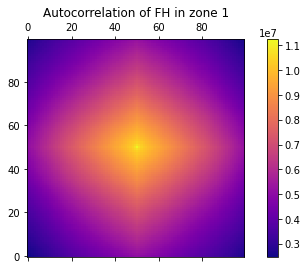

In [85]:
###FH zone1
corr=autocorrelation(ds21)
fig, axes = plt.subplots(1,1,figsize=(8, 4))
art = axes.matshow(corr, origin='lower', cmap='plasma')
axes.set_title('Autocorrelation of FH in zone 1')
plt.colorbar(art, ax=axes)


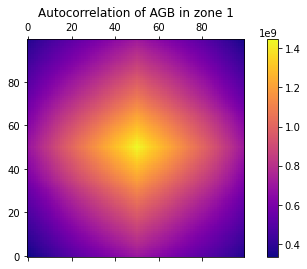

In [86]:
### AGB zone1
corr=autocorrelation(ds31)
fig, axes = plt.subplots(1,1,figsize=(8, 4))
art = axes.matshow(corr, origin='lower', cmap='plasma')
axes.set_title('Autocorrelation of AGB in zone 1')
plt.colorbar(art, ax=axes)


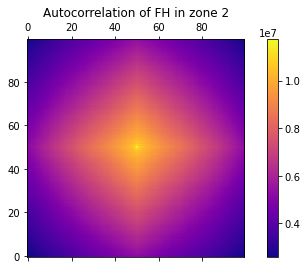

In [87]:
###FH zone2
corr=autocorrelation(ds22)
fig, axes = plt.subplots(1,1,figsize=(8, 4))
art = axes.matshow(corr, origin='lower', cmap='plasma')
axes.set_title('Autocorrelation of FH in zone 2')
plt.colorbar(art, ax=axes)

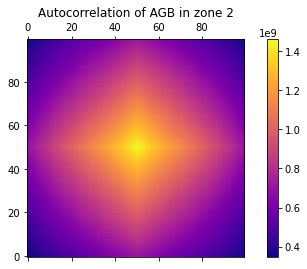

In [88]:
### AGB zone2
corr=autocorrelation(ds32)
fig, axes = plt.subplots(1,1,figsize=(8, 4))
art = axes.matshow(corr, origin='lower', cmap='plasma')
axes.set_title('Autocorrelation of AGB in zone 2')
plt.colorbar(art, ax=axes)


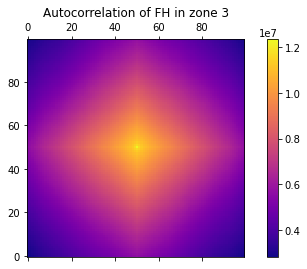

In [89]:
###FH zone3
corr=autocorrelation(ds23)
fig, axes = plt.subplots(1,1,figsize=(8, 4))
art = axes.matshow(corr, origin='lower', cmap='plasma')
axes.set_title('Autocorrelation of FH in zone 3')
plt.colorbar(art, ax=axes)

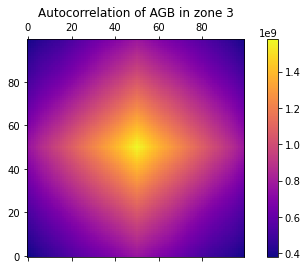

In [90]:
### AGB zone3
corr=autocorrelation(ds33)
fig, axes = plt.subplots(1,1,figsize=(8, 4))
art = axes.matshow(corr, origin='lower', cmap='plasma')
axes.set_title('Autocorrelation of AGB in zone 3')
plt.colorbar(art, ax=axes)

### Intercorelation

In [93]:
#######
def PCC(A,B):
    a=A.ravel()
    b=B.ravel()
    a1=a-np.mean(a)
    b1=b-np.mean(b)
    return a1.dot(b1)/np.sqrt(np.sum(a1**2))/np.sqrt(np.sum(b1**2))
#########
def to_matrix_cts_by_piece(X):
    # X must be square matrix and shape X divisible by 5
    Y=np.copy(X)
    for i in range(int(np.shape(Y)[0]/5)):
        for j in range(int(np.shape(Y)[0]/5)):
            Y[5*i:5*i+5,5*j:5*j+5]=np.sum(Y[5*i:5*i+5,5*j:5*j+5])/25 * np.ones((5,5))
    return Y
########
def correlation(A,B,k):
    C=np.zeros((int(A.shape[0]/k),int(A.shape[1]/k)))
    for i in range(int(A.shape[0]/k)):
        for j in range(int(A.shape[1]/k)):
            C[i,j]=PCC(A[k*i:k*i+k,k*j:k*j+k],B[k*i:k*i+k,k*j:k*j+k])
    return C

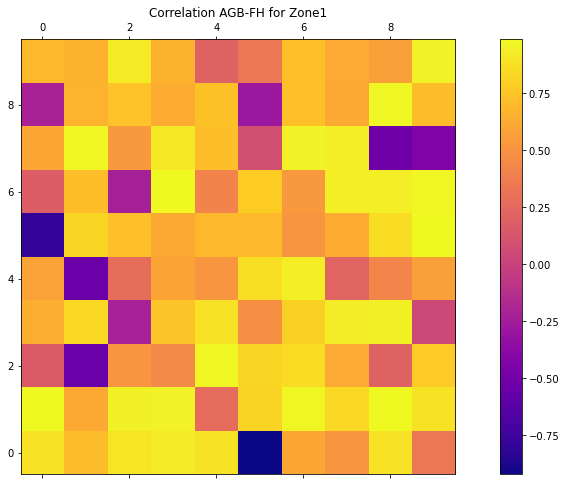

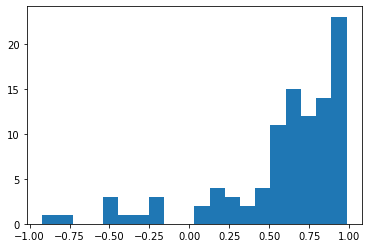

In [95]:
###########Correlation AGB-FH for Zone1
ds21_new=to_matrix_cts_by_piece(ds21)
C1=correlation(ds21_new,ds31,10)
fig, axes = plt.subplots(1,1,figsize=(16, 8))
art = axes.matshow(C1, origin='lower', cmap='plasma')
axes.set_title('Correlation AGB-FH for Zone1')
plt.colorbar(art, ax=axes)
plt.show()          
_=plt.hist(C1.flatten(),bins=20)
plt.show()

In [ ]:
###########Correlation AGB-FH for Zone2
#ds22_new=to_matrix_cts_by_piece(ds22)
#C2=correlation(ds22_new,ds32,10)
#fig, axes = plt.subplots(1,1,figsize=(16, 8))
#art = axes.matshow(C2, origin='lower', cmap='plasma')
#axes.set_title('Correlation')
#plt.colorbar(art, ax=axes)
#plt.show()          
#_=plt.hist(C2.flatten(),bins=20)
#plt.show() 


In [ ]:
###########Correlation AGB-FH for Zone3
#ds23_new=to_matrix_cts_by_piece(ds23)
#C3=correlation(ds23_new,ds33,10)
#fig, axes = plt.subplots(1,1,figsize=(16, 8))
#art = axes.matshow(C3, origin='lower', cmap='plasma')
#axes.set_title('Correlation')
#plt.colorbar(art, ax=axes)
#plt.show()          
#_=plt.hist(C3.flatten(),bins=20)
#plt.show()    

In [ ]:
###########Correlation AGB-FH for Zone3
#ds23_new=to_matrix_cts_by_piece(ds23)
#C3=correlation(ds23_new,ds33,10)
#fig, axes = plt.subplots(1,1,figsize=(16, 8))
#art = axes.matshow(C3, origin='lower', cmap='plasma')
#axes.set_title('Correlation')
#plt.colorbar(art, ax=axes)
#plt.show()          
#_=plt.hist(C3.flatten(),bins=20)
#plt.show()    

#### Calculate the slope map

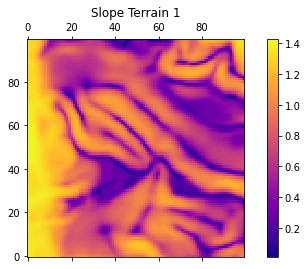

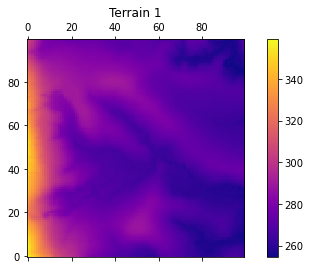

In [109]:
def slope(A):
    x=np.arange(A.shape[1])*1.   ### *1. to turn array into float
    x=np.tile(x,A.shape[0])
    y=np.arange(A.shape[0])*1.
    y=np.repeat(y,A.shape[1])
    x1=x-np.mean(x)
    y1=y-np.mean(y)
    l00=np.sum(x1**2)
    l11=np.sum(y1**2)
    l01=x1.dot(y1)
    h=A.ravel()
    h1=h-np.mean(h)
    r0=h1.dot(x1)
    r1=h1.dot(y1)
    a0=(l11*r0-l01*r1)/(l00*l11-l01**2)
    a1=(l00*r1-l01*r0)/(l00*l11-l01**2)
    #b=np.mean(h)-a0*np.mean(x)-a1*np.mean(y)
    n=np.array([-a0,-a1,1.])
    z=np.array([0,0,1.])
    #return n.dot(z)/np.sqrt(np.sum(n**2))/np.sqrt(np.sum(z**2))
    return np.arccos(n.dot(z)/np.sqrt(np.sum(n**2))/np.sqrt(np.sum(z**2)))
dslope1=ds_band1[697:803,397:503]
pente=np.zeros(ds11.shape)
for i in range(pente.shape[0]):
    for j in range(pente.shape[1]):
        pente[i,j]=slope(dslope1[i:i+7,j:j+7])
fig, axes = plt.subplots(1, 1, figsize=(8,4))
art1=axes.matshow(pente, origin='lower', cmap='plasma')
axes.set_title('Slope Terrain 1')
plt.colorbar(art1, ax=axes)
plt.show()
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
art1=axes.matshow(ds11, origin='lower', cmap='plasma')
axes.set_title('Terrain 1')
plt.colorbar(art1, ax=axes)
plt.show()

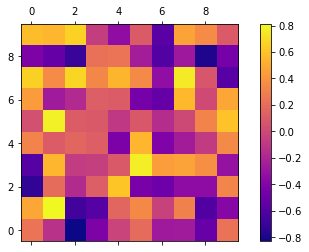

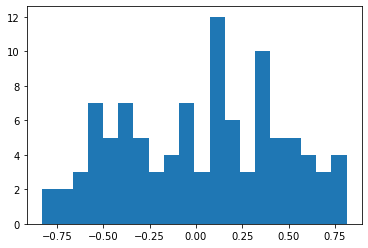

In [110]:
###########Correlation AGB-pente for Zone1
dslope1=ds_band1[700-2-3:800-2+3,400-1-3:500-1+3]
pente1=np.zeros(ds11.shape)
for i in range(pente1.shape[0]):
    for j in range(pente1.shape[1]):
        pente1[i,j]=slope(dslope1[i:i+7,j:j+7])
C1=correlation(pente1,ds31,10)
fig, axes = plt.subplots(1,1,figsize=(8, 4))
art = axes.matshow(C1, origin='lower', cmap='plasma')
#axes.set_title('Correlation')
plt.colorbar(art, ax=axes)
plt.show()          
_=plt.hist(C1.flatten(),bins=20)
plt.show() 


In [107]:
# ###########Correlation AGB-FH for Zone2
# dslope2=ds_band2[700-2-3:800-2+3,400-1-3:500-1+3]
# pente2=np.zeros(ds12.shape)
# for i in range(pente2.shape[0]):
#     for j in range(pente2.shape[1]):
#         pente2[i,j]=slope(dslope2[i:i+7,j:j+7])
# C2=correlation(pente2,ds32,10)
# fig, axes = plt.subplots(1,1,figsize=(16, 8))
# art = axes.matshow(C2, origin='lower', cmap='plasma')
# #axes.set_title('Correlation')
# plt.colorbar(art, ax=axes)
# plt.show()          
# _=plt.hist(C2.flatten(),bins=20)
# plt.show() 

In [108]:
# ###########Correlation AGB-FH for Zone3
# dslope3=ds_band3[700-2-3:800-2+3,400-1-3:500-1+3]
# pente3=np.zeros(ds13.shape)
# for i in range(pente3.shape[0]):
#     for j in range(pente3.shape[1]):
#         pente3[i,j]=slope(dslope3[i:i+7,j:j+7])
# C3=correlation(pente3,ds33,10)
# fig, axes = plt.subplots(1,1,figsize=(16, 8))
# art = axes.matshow(C3, origin='lower', cmap='plasma')
# #axes.set_title('Correlation')
# plt.colorbar(art, ax=axes)
# plt.show()          
# _=plt.hist(C3.flatten(),bins=20)
# plt.show()

## AGB predicted map from FH

Score: -24.871771659310678
Max error: 137.60776
-3535.3403210995757


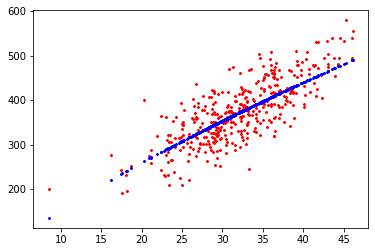

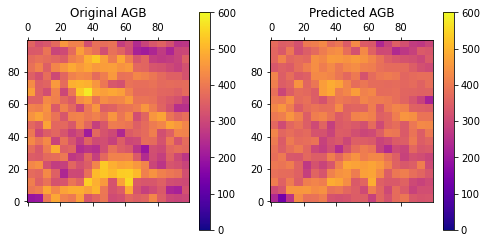

In [127]:
######
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#### Zone 1
ds21_new=to_matrix_cts_by_piece(ds21)
X1=ds21_new.reshape(ds21_new.shape[0]*ds21_new.shape[1],1)
Y1=ds31.reshape(ds21_new.shape[0]*ds21_new.shape[1],1)
reg = LinearRegression().fit(np.log(X1), np.log(Y1))
print("Score: "+str(reg.score(X1,Y1)))
Y_predict1=np.exp(reg.predict(np.log(X1)))
im_predict1=Y_predict1.reshape((ds21_new.shape[0],ds21_new.shape[1]))
print("Max error: "+str(np.max(abs(im_predict1-ds31))))
print(r2_score(X1, Y_predict1))
#plt.boxplot(abs(im_predict1-ds31).flatten())
#Z=abs(im_predict1-ds31)
#Z[Z<100]=0
#plt.imshow(Z)
#plt.show()
plt.scatter(X1,Y1, c='r',s=0.5)
plt.scatter(X1,Y_predict1, c='b',s=0.5)
plt.show()
fig, axes = plt.subplots(1,2,figsize=(8, 4))
art1 = axes[0].matshow(ds31, origin='lower', cmap='plasma',vmin=0,vmax=600)
axes[0].set_title('Original AGB')
plt.colorbar(art1, ax=axes[0])
art2 = axes[1].matshow(im_predict1, origin='lower', cmap='plasma',vmin=0,vmax=600)
axes[1].set_title('Predicted AGB')
plt.colorbar(art2, ax=axes[1])

In [128]:
# ###Zone2
# ds22_new=to_matrix_cts_by_piece(ds22)
# X2=ds22_new.reshape(ds22_new.shape[0]*ds22_new.shape[1],1)
# Y2=ds32.reshape(ds22_new.shape[0]*ds22_new.shape[1],1)
# reg = LinearRegression().fit(np.log(X2), np.log(Y2))
# print("Score: "+str(reg.score(X2,Y2)))
# Y_predict2=np.exp(reg.predict(np.log(X2)))
# im_predict2=Y_predict2.reshape((ds22_new.shape[0],ds22_new.shape[1]))
# print("Max error: "+str(np.max(abs(im_predict2-ds32))))
# #plt.boxplot(abs(im_predict2-ds32).flatten())
# #Z=abs(im_predict2-ds32)
# #Z[Z<100]=0
# #plt.imshow(Z)
# #plt.show()
# plt.scatter(X2,Y2, c='r',s=0.5)
# plt.scatter(X2,Y_predict2, c='b',s=0.5)
# plt.show()
# fig, axes = plt.subplots(1,2,figsize=(8, 4))
# art1 = axes[0].matshow(ds32, origin='lower', cmap='plasma',vmin=0,vmax=600)
# axes[0].set_title('Original AGB')
# plt.colorbar(art1, ax=axes[0])
# art2 = axes[1].matshow(im_predict2, origin='lower', cmap='plasma',vmin=0,vmax=600)
# axes[1].set_title('Predicted AGB')
# plt.colorbar(art2, ax=axes[1])

In [129]:
# ###Zone3
# ds23_new=to_matrix_cts_by_piece(ds23)
# X3=ds23_new.reshape(ds23_new.shape[0]*ds23_new.shape[1],1)
# Y3=ds33.reshape(ds23_new.shape[0]*ds23_new.shape[1],1)
# reg = LinearRegression().fit(np.log(X3), np.log(Y3))
# print("Score: "+str(reg.score(X3,Y3)))
# Y_predict3=np.exp(reg.predict(np.log(X3)))
# im_predict3=Y_predict3.reshape((ds23_new.shape[0],ds23_new.shape[1]))
# print("Max error: "+str(np.max(abs(im_predict3-ds33))))
# #plt.boxplot(abs(im_predict3-ds33).flatten())
# #Z=abs(im_predict3-ds33)
# #Z[Z<100]=0
# #plt.imshow(Z)
# #plt.show()
# plt.scatter(X3,Y3, c='r',s=0.5)
# plt.scatter(X3,Y_predict3, c='b',s=0.5)
# plt.show()
# fig, axes = plt.subplots(1,2,figsize=(8, 4))
# art1 = axes[0].matshow(ds33, origin='lower', cmap='plasma',vmin=0,vmax=600)
# axes[0].set_title('Original AGB')
# plt.colorbar(art1, ax=axes[0])
# art2 = axes[1].matshow(im_predict3, origin='lower', cmap='plasma',vmin=0,vmax=600)
# axes[1].set_title('Predicted AGB')
# plt.colorbar(art2, ax=axes[1])

### MSE analysis

In [132]:
import math
########################    
def MSE_compute(err_mat,k):
    MSE=np.zeros(int(360/k))
    indice=np.arange(int(360/k))
    alpha1=indice*k*math.pi/180
    for i in range(int(360/k)):
        alpha=alpha1[i]
        if abs(math.tan(alpha))<err_mat.shape[1]/err_mat.shape[0]:
            y=int(math.cos(alpha)>=0)*np.arange(int(err_mat.shape[0]/2))-int(math.cos(alpha)<0)*np.arange(int(err_mat.shape[0]/2))
            x=int(math.sin(alpha)>=0)*np.floor(y*math.tan(alpha))+int(math.sin(alpha)<0)*np.ceil(y*math.tan(alpha))
        else:
            x=int(math.sin(alpha)>=0)*np.arange(int(err_mat.shape[1]/2))-int(math.sin(alpha)<0)*np.arange(int(err_mat.shape[1]/2))
            y=int(math.cos(alpha)>=0)*np.floor(x/math.tan(alpha))+int(math.cos(alpha)<0)*np.ceil(x/math.tan(alpha))
        x=x+err_mat.shape[1]/2
        y=y+err_mat.shape[0]/2
        for j in range(len(x)):
            MSE[i]+=err_mat[int(x[j]),int(y[j])]**2
        MSE[i]/=len(x)
    return MSE,alpha1

Score: -24.871771659310678


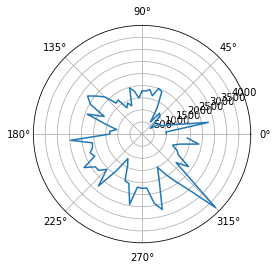

In [136]:
####Zone1
ds21_new=to_matrix_cts_by_piece(ds21)
X1=ds21_new.reshape(ds21_new.shape[0]*ds21_new.shape[1],1)
Y1=ds31.reshape(ds21_new.shape[0]*ds21_new.shape[1],1)
reg = LinearRegression().fit(np.log(X1), np.log(Y1))
print("Score: "+str(reg.score(X1,Y1)))
Y_predict1=np.exp(reg.predict(np.log(X1)))
im_predict1=Y_predict1.reshape((ds21_new.shape[0],ds21_new.shape[1]))
err_mat1=im_predict1-ds31
MSE1,alpha1=MSE_compute(err_mat1,5)
plt.polar(alpha1,MSE1)
plt.show()

# ###Zone2
# ds22_new=to_matrix_cts_by_piece(ds22)
# X2=ds22_new.reshape(ds22_new.shape[0]*ds22_new.shape[1],1)
# Y2=ds32.reshape(ds22_new.shape[0]*ds22_new.shape[1],1)
# reg = LinearRegression().fit(np.log(X2), np.log(Y2))
# print("Score: "+str(reg.score(X2,Y2)))
# Y_predict2=np.exp(reg.predict(np.log(X2)))
# im_predict2=Y_predict2.reshape((ds22_new.shape[0],ds22_new.shape[1]))
# err_mat2=im_predict2-ds32
# MSE2,alpha2=MSE_compute(err_mat2,5)
# plt.polar(alpha2,MSE2)
# plt.show()

# ###Zone3
# ds23_new=to_matrix_cts_by_piece(ds23)
# X3=ds23_new.reshape(ds23_new.shape[0]*ds23_new.shape[1],1)
# Y3=ds33.reshape(ds23_new.shape[0]*ds23_new.shape[1],1)
# reg = LinearRegression().fit(np.log(X3), np.log(Y3))
# print("Score: "+str(reg.score(X3,Y3)))
# Y_predict3=np.exp(reg.predict(np.log(X3)))
# im_predict3=Y_predict3.reshape((ds23_new.shape[0],ds23_new.shape[1]))
# err_mat3=im_predict3-ds33
# MSE3,alpha3=MSE_compute(err_mat3,5)
# plt.polar(alpha3,MSE3)
# plt.show()

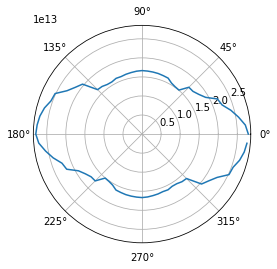

In [137]:
##############MSE for autocorrelation matrix of matrix of error
###zone1
corr1=autocorrelation(err_mat1)
MSE1,alpha1=MSE_compute(corr1,5)
plt.polar(alpha1,MSE1)
plt.show()
# ###zone2
# corr2=autocorrelation(err_mat2)
# MSE2,alpha2=MSE_compute(corr2,5)
# plt.polar(alpha2,MSE2)
# plt.show()
# ###zone3
# corr3=autocorrelation(err_mat3)
# MSE3,alpha3=MSE_compute(corr3,5)
# plt.polar(alpha3,MSE3)
# plt.show()